<a href="https://colab.research.google.com/github/Narutchai01/ProjectC-Model/blob/main/notebook/interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Apr 12 00:37:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   53C    P8               3W /  61W |   1369MiB /  4096MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

In [ ]:
!unzip gdrive/MyDrive/DateSet/archive.zip

In [ ]:
!unzip gdrive/MyDrive/DateSet/Dataset\ for\ Crop\ Pest\ and\ Disease\ Detection.zip

In [ ]:
%pip install ultralytics
%pip install -r requirements.txt

In [ ]:
%pip install -U ultralytics

In [2]:
import os

HOME = os.getcwd()

print(HOME)

d:\Work\ProjectC-Model\notebook


In [4]:
from ultralytics import YOLO


model = YOLO('yolov8n-cls.pt')

model.train(data=HOME+'/Data/NewDataSet/Data', epochs=5, imgsz=400)

Ultralytics YOLOv8.1.47  Python-3.11.5 torch-2.2.0 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=d:\Work\ProjectC-Model\notebook/Data/NewDataSet/Data, epochs=5, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning D:\Work\ProjectC-Model\notebook\Data\NewDataSet\Data\train... 118256 images, 0 corrupt: 100%|██████████| 118256/118256 [02:08<00:00, 918.16it/s]


train: New cache created: D:\Work\ProjectC-Model\notebook\Data\NewDataSet\Data\train.cache


val: Scanning D:\Work\ProjectC-Model\notebook\Data\NewDataSet\Data\test... 33721 images, 0 corrupt: 100%|██████████| 33721/33721 [00:37<00:00, 891.89it/s]


val: New cache created: D:\Work\ProjectC-Model\notebook\Data\NewDataSet\Data\test.cache


In [2]:
import numpy as np
from ultralytics import YOLO


model = YOLO('D:/Work/ProjectC-Model/notebook/runs/classify/train\weights/best.pt')  # load a custom model

results = model('D:/Work/ProjectC-Model/notebook/Data/TestDataSet\Cashew/test/anthracnose/0cashew_valid_anthracnose.JPG')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 D:\Work\ProjectC-Model\notebook\Data\TestDataSet\Cashew\test\anthracnose\0cashew_valid_anthracnose.JPG: 416x416 healthy5877 0.76, anthracnose3102 0.11, leaf miner3466 0.06, red rust4751 0.06, gumosis1714 0.00, 5.0ms
Speed: 12.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)
{0: 'anthracnose3102', 1: 'gumosis1714', 2: 'healthy5877', 3: 'leaf miner3466', 4: 'red rust4751'}
[0.1147160604596138, 0.0008533014915883541, 0.7649934887886047, 0.060572654008865356, 0.058864474296569824]
healthy5877


In [1]:
namesARR = ["a","a","a","b","b"]


print(max(set(namesARR), key = namesARR.count))




a


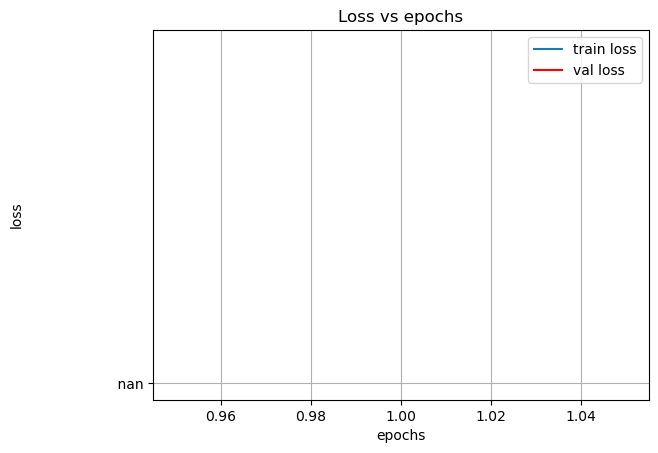

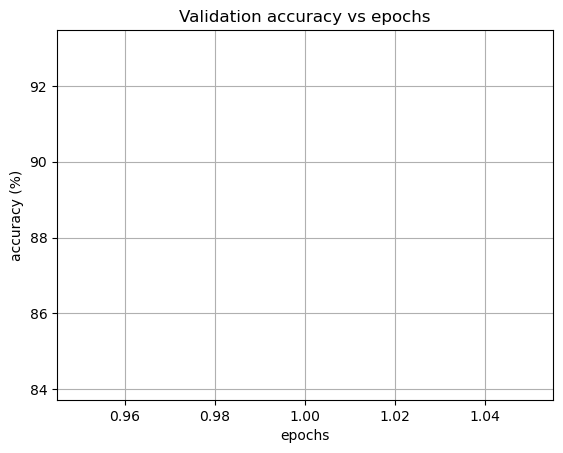

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = 'D:/Work/ProjectC-Model/notebook/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()
